Practical: k-means
==


PART 1 - Hard coded k-means
--

### Implementing $k$-means
- In this first part of the practical we're going to implement $k$-means from scratch based on what we learnt in the lecture.
- The file MyKmeans.py contains code that implements $k$-means clustering
- Open the file and go through the function making sure you understand what every step does

Let's first simulate some data to use in our clustering and plot them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
data=np.random.normal(size=250*2).reshape(250,2)
data[0:124,0]=data[0:124,0]+3
data[0:124,1]=data[0:124,1]-4

plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(data[:,0],data[:,1])

Now let's run MyKmeans() in this dataset and see if we identify the two clusters:

In [2]:
from MyKmeans import MyKmeans #this runs the contents of the file MyKeans.py that you examined above

            0         1  cluster
0    2.583242 -4.056267      0.0
1    0.863804 -2.359729      1.0
2    1.206564 -4.841747      0.0
3    3.502881 -5.245288      0.0
4    1.942048 -4.909008      0.0
..        ...       ...      ...
245 -1.903821 -1.198140      1.0
246 -0.910066  1.176454      1.0
247  0.299211  0.679267      1.0
248 -0.017661  0.236041      1.0
249  0.494036  1.546278      1.0

[250 rows x 3 columns]


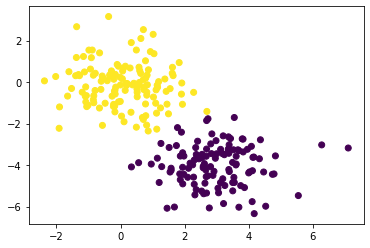

In [3]:
import pandas as pd
data_df=pd.DataFrame(data)
MyRes2 = MyKmeans(df=data_df,n_cluster=2, c_initial=range(2))
print(MyRes2)
plt.scatter(MyRes2.iloc[:,0],MyRes2.iloc[:,1], c=MyRes2.iloc[:,2])

From visual inspection it looks like $k$-means has done a pretty good job in separating the data into clusters.

Use `crosstab()` from Pandas to compare the clusters' allocation with the true clusters:

In [4]:
true=list([0]*125+[1]*125) #construct a list with "true" cluster number
pd.crosstab(MyRes2.cluster,pd.Series(true), colnames=["True"], rownames=["kmeans"])

True,0,1
kmeans,,
0.0,120,0
1.0,5,125


Has it grouped all points correctly? Run the above for different numbers of clusters by adjusing `n_cluster` and `c_initial` and see how the clusters change.

True,0,1
kmeans,,
0.0,88,0
1.0,4,125
2.0,33,0


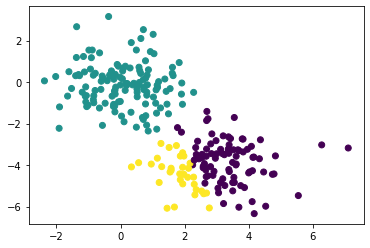

In [5]:
#Insert your code here
MyRes3 = MyKmeans(df=data_df,n_cluster=3, c_initial=range(8,11))
plt.scatter(MyRes3.iloc[:,0],MyRes3.iloc[:,1], c=MyRes3.iloc[:,2])
pd.crosstab(MyRes3.cluster,pd.Series(true), colnames=["True"], rownames=["kmeans"])

Try also running it for different starting points to see whether and how the resulting clustering changes

 ⚠️❓HOW DOES THIS DIFFER FROM C_INITIAL ABOVE??

We've seen in the lecture that $k$-means tries to minimize the total within cluster sum of squares. The function ***calculateSS()*** below takes as intput the results of MyKmeans and calculates the total, total within clusters and total between clusters sum of squares.

Go through the function and make sure you understand how it works and the differences between each quantity.

In [6]:
#Function calculateSS() 
#  Input: output from MyKmeans()
#  Output: dataframe with Total within clusters, Between and Total Sum of Squares.

def calculateSS(res_clusters):
    
    #Create a list with enough elements to store a number for each cluster referenced 
    Within_SS = [0]*int(res_clusters.iloc[:,res_clusters.shape[1]-1].max()+1)
    
    Total_SS = sum(res_clusters.iloc[:,0:res_clusters.shape[1]-1].apply(lambda x: sum((x-x.mean())**2), axis=1))
    
    for i in pd.unique(res_clusters.iloc[:,res_clusters.shape[1]-1]):
        i=int(i)
        df=res_clusters[res_clusters.cluster==i]
        Within_SS[i] = sum(df.iloc[:,0:df.shape[1]-1].apply(lambda x: sum((x-x.mean())**2)))
    
    Total_Within_SS = sum(Within_SS)
    
    Between_SS = Total_SS-Total_Within_SS
    
    res=pd.DataFrame([[Total_Within_SS,Between_SS,Total_SS]])
    res.columns=["Tot_Within","Between","Total"]
    
    return(res)
    

In [7]:
calculateSS(MyRes2)

,Tot_Within,Between,Total
0,525.040522,2663.309426,3188.349948


In our example, we know that there are 2 clusters by construction. If we didn't, how would we choose $k$?

We'd need to run MyKmeans for various values of $k$ and choose the one after which the reduction in total within clusters variation doesn't change much.

Let's write a function that iteratively changes $k$ and each time calculates the total within clusters sum of squares using our `calculateSS()` function:

In [8]:
def choose_k(max_k, data):
    #create placeholder lists with the correct number of elements
    res = [0] * (max_k+1)
    MySS = [0] * (max_k+1)
    for i in range(1,max_k+1):
        print("Trying k means with ",i," clusters")
        res[i]=MyKmeans(df=data, n_cluster=i, c_initial=range(i))
        MySS[i]=calculateSS(res_clusters=res[i])
    return MySS[1:max_k+1]

Run the function on `data_df` for up to 10 clusters and plot the results:

In [9]:
k=10
k_res=choose_k(max_k=k, data=data_df)
k_res=pd.concat(k_res, ignore_index=True)

Trying k means with  1  clusters
Trying k means with  2  clusters
Trying k means with  3  clusters
Trying k means with  4  clusters
Trying k means with  5  clusters
Trying k means with  6  clusters
Trying k means with  7  clusters
Trying k means with  8  clusters
Trying k means with  9  clusters
Trying k means with  10  clusters


In [10]:
k_res

,Tot_Within,Between,Total
0,1964.268018,1224.081930,3188.349948
1,525.040522,2663.309426,3188.349948
2,453.781471,2734.568477,3188.349948
3,395.560995,2792.788953,3188.349948
4,365.874121,2822.475827,3188.349948
5,346.144405,2842.205543,3188.349948
6,334.341130,2854.008818,3188.349948
7,310.480209,2877.869739,3188.349948
8,290.051218,2898.298730,3188.349948
9,282.953776,2905.396172,3188.349948


/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Total Within SS')

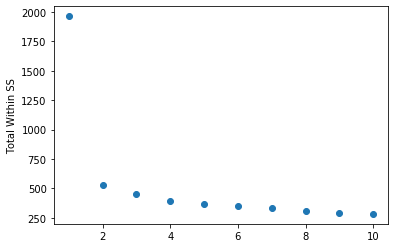

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),k_res['Tot_Within'], 'o')
plt.ylabel("Total Within SS")

Looking at the above plot, would anything stop you choosing $k=3$? Not really.

Run `MyKmeans()` for 3 and 4 clusters and plot the results.



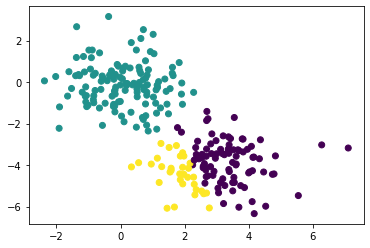

In [12]:
#answer
MyRes3 = MyKmeans(df=data_df,n_cluster=3, c_initial=range(1,4))
plt.scatter(MyRes3.iloc[:,0],MyRes3.iloc[:,1], c=MyRes3.iloc[:,2])

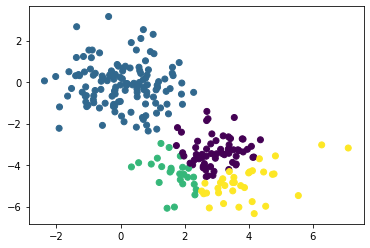

In [13]:
#asnwer
MyRes4 = MyKmeans(df=data_df,n_cluster=4, c_initial=range(1,5))
plt.scatter(MyRes4.iloc[:,0],MyRes4.iloc[:,1], c=MyRes4.iloc[:,2])

PART 2 - Using kmeans from scikit-learn
--

Most of the things we've done so far can easily be done using the kmeans function from scikit-learn.

In [14]:
from sklearn.cluster import KMeans

To run scikit-learn's `KMeans` on our data for two clusters using the same initial centroids as we did before, run:

To run scikit-learn's KMeans() on our data for two clusters using the same initial centroids as we did before, run the following:

In [15]:
model=KMeans(n_clusters=2,init=data_df.iloc[0:2,:],max_iter=40)
sk_kmeans0=model.fit(data_df)
sk_kmeans0

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=          0         1
0  2.583242 -4.056267
1  0.863804 -2.359729,
       max_iter=40, n_clusters=2)

You can see the which clusters the points are assigned to:

In [16]:
sk_kmeans0.predict(data_df)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

The total within sum of squares can be obtained as follows:

In [17]:
sk_kmeans0.inertia_

523.3798951150475

Unfortunately, scikit-learn does not provide a way to directly access values for between-sum-of-squares and total-sum-of-squares. Positions of the centroids can be obtained as follows:

In [18]:
sk_kmeans0.cluster_centers_

array([[ 2.95458524, -3.9871701 ],
       [ 0.08196757, -0.13672734]])

You don't have to specify the initial centroids. You can let scikit learn find these. (Indeed, this is what it expects by default, which is why you may have received a warning above). For reproducible results, you can set the seed for random_stage:

In [19]:
model=KMeans(n_clusters=2,max_iter=40, random_state=777777)
sk_kmeans0=model.fit(data_df)
sk_kmeans0

KMeans(max_iter=40, n_clusters=2, random_state=777777)

Compare the results with those obtained from our implementation.

`KMeans` runs the algorithm multiple times using different starting centroids (10, by default) and returns the one with the best results. It's good practice to try different starting centroids as the clustering results can depend on these. You can change the number of starting centroids that are used using the `n_init` parameter:

In [20]:
model=KMeans(n_clusters=2, n_init=20, max_iter=40, random_state=777777)
sk_kmeans0=model.fit(data_df)
sk_kmeans0

KMeans(max_iter=40, n_clusters=2, n_init=20, random_state=777777)

Alternative `KMeans()` implementations are available in scikit-learn that can be more robust than ours. Look at the documentation for the KMeans() function that's included in your installed version of sklearn.

Let's slight alter our `choose_k` function to use the utput

In [21]:
def Schoose_k(max_k, data):
    #create placeholder lists with the correct number of elements
    res = [0] * (max_k+1)
    MySS = [0] * (max_k+1)
    for i in range(1,max_k+1):
        print("Trying k means with ",i," clusters")
        model=KMeans(n_clusters=i, n_init=20, max_iter=40, random_state=777777)
        sk_kmeans0=model.fit(data)
        res[i]=sk_kmeans0.inertia_
    return res[1:max_k+1]

Run the above updated version using,

In [22]:
sk_res = Schoose_k(max_k=k, data=data_df)

Trying k means with  1  clusters
Trying k means with  2  clusters
Trying k means with  3  clusters
Trying k means with  4  clusters
Trying k means with  5  clusters
Trying k means with  6  clusters
Trying k means with  7  clusters
Trying k means with  8  clusters
Trying k means with  9  clusters
Trying k means with  10  clusters


Let's plot the results along with ours and compare,

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Total Within SS')

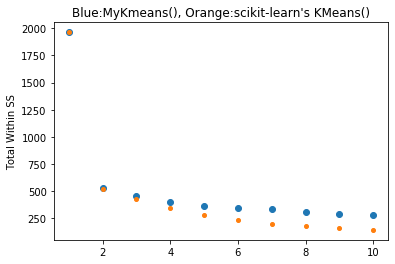

In [23]:
plt.title("Blue:MyKmeans(), Orange:scikit-learn's KMeans()")
plt.plot(range(1,11),k_res['Tot_Within'], 'o')
plt.ylabel("Total Within SS")
plt.plot(range(1,11),sk_res, 'o', markersize=4)
plt.ylabel("Total Within SS")

Let's use $k=2$ again and run kmeans() to get the clustering results

In [24]:
sk_res = KMeans(n_clusters=2, n_init=20, max_iter=40, random_state=777777).fit_predict(data_df)

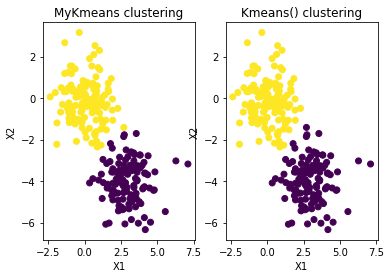

In [25]:
plt.subplot(1,2,1)
plt.title("MyKmeans clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(MyRes2.iloc[:,0],MyRes2.iloc[:,1], c=MyRes2.iloc[:,2])

plt.subplot(1,2,2)
plt.title("Kmeans() clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(data_df.iloc[:,0], data_df.iloc[:,1],c=sk_res)

What do you notice in the above plots? Are the results obtained the same?

PART 3 - KMeans() on the iris dataset
--

The iris dataset is often used to illustrate clustering and classification and it's also available in sklearn.datasets.

The dataset contains the length and width of sepals and petals of different flowers of 3 different species: virginica, versicolor and setosa.

In the plot below, the colour corresponds to the flower family of each observation:

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


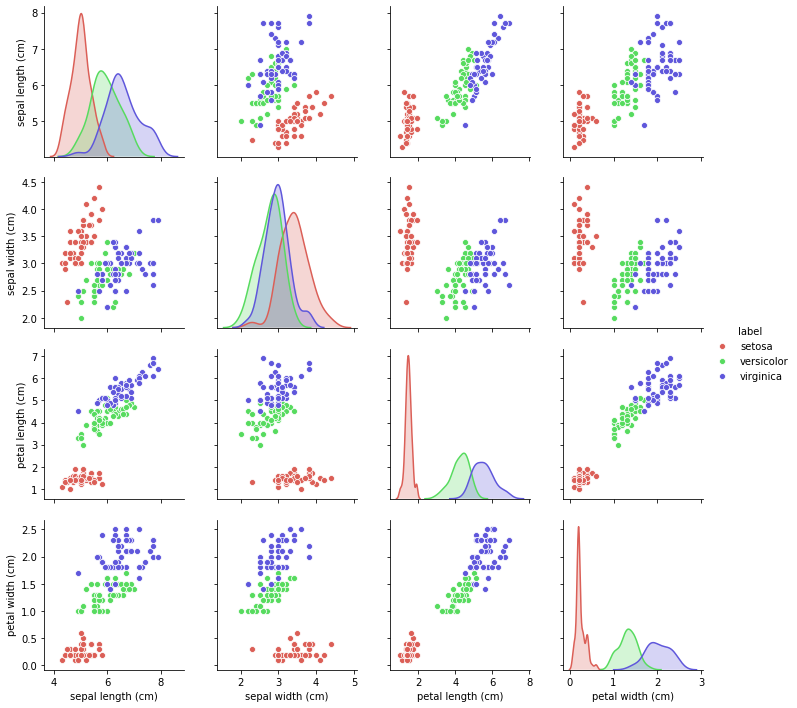

In [26]:
import seaborn as sns           # the seaborn library provides a good function for making pair plots
import sklearn.datasets as skd  # we use sklearn.datasets to get the iris dataset

iris=skd.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df.columns=iris.feature_names
iris_df['label']=[iris.target_names[t] for t in iris.target]

palette=sns.color_palette("hls", 3) # gives a red-green-blue colour palette
sns.pairplot(iris_df, hue='label', palette=palette)


As we see below, the dataset has 50 observations from each species

In [27]:
iris_df['label'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: label, dtype: int64

Looking at the pair plot above, could kmeans distinguish between the 3 species? Is there any one with which it could struggle?

Let's try kmeans on the iris dataset using the true cluster number

In [28]:
cl_iris=KMeans(n_clusters=3, n_init=20, max_iter=100, random_state=777777).fit_predict(iris_df.iloc[:,0:4])

In [29]:
iris_df['cluster_label']=cl_iris

Plot the data and colour the points by the assigned clusters. How do the results compare to the true groups? **NOTE:** the colour-cluster combination will not align with those of the previous plot.

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


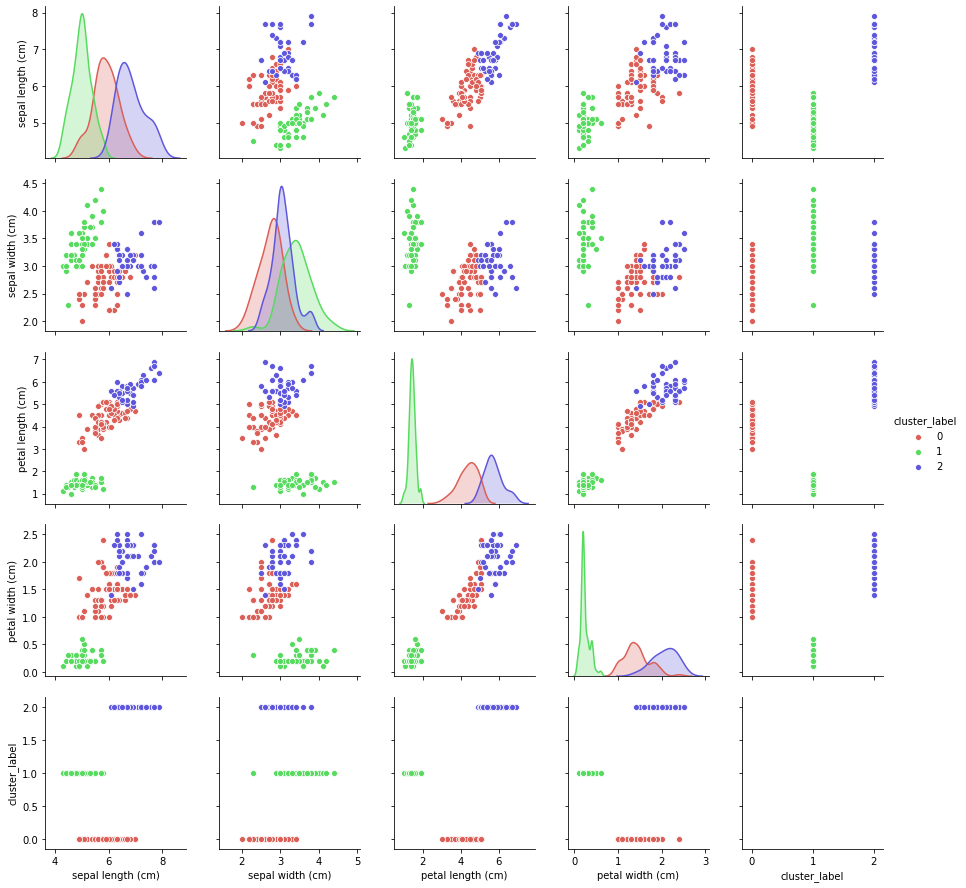

In [30]:
#Insert your code here
sns.pairplot(iris_df, hue='cluster_label', palette=palette)

Has _k_-means done a good job?

Compare the true class and the assigned clusters using [`crosstab` from Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).

In [31]:
#Insert your code here
pd.crosstab(iris_df.label, iris_df.cluster_label)
# doesn't look correct. Need to assign correct classification labels

iris_df['cluster_class_label']= 'virginica'
iris_df.cluster_class_label[iris_df.cluster_label==2]= 'virginica'
iris_df.cluster_class_label[iris_df.cluster_label==1]= 'setosa'
iris_df.cluster_class_label[iris_df.cluster_label==0]= 'versicolor'

pd.crosstab(iris_df.label, iris_df.cluster_class_label)

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster_class_label,setosa,versicolor,virginica
label,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


Now try scaling your data first before applying kmeans.

In [32]:
from sklearn.preprocessing import scale
iris_scaled=scale(iris.data)

Look at the documentation of `scale` if you're not sure what it's doing.

Run KMeans() on the scaled dataset, using the same seed, and store the results in cl_iris_scaled

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


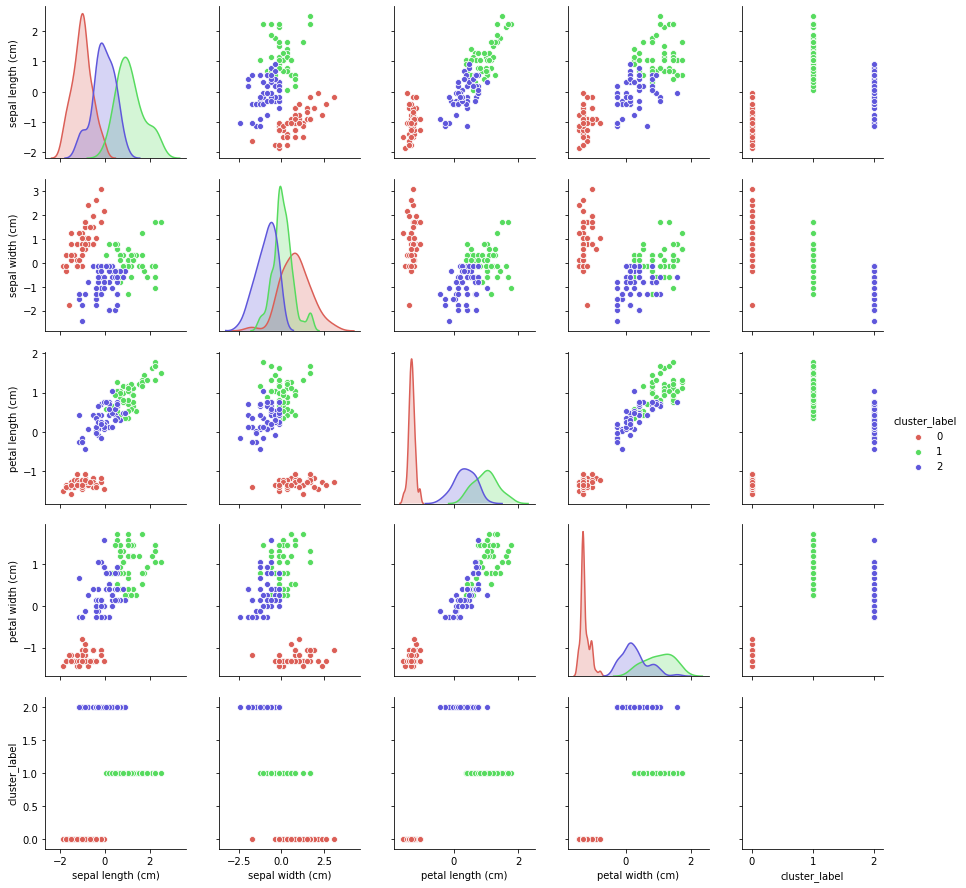

In [33]:
#Insert your code here
iris=skd.load_iris()
iris_scaled_df=pd.DataFrame(iris_scaled)
iris_scaled_df.columns=iris.feature_names
iris_scaled_df['label']=[iris.target_names[t] for t in iris.target]

cl_iris_scaled=KMeans(n_clusters=3, n_init=20, max_iter=100, random_state=777777).fit_predict(iris_scaled_df.iloc[:,0:4])
iris_scaled_df['cluster_label']=cl_iris_scaled



sns.pairplot(iris_scaled_df, hue='cluster_label', palette=palette)

Compare with the results from k_iris and the true labels.

In [34]:
#answer
#comparing with the true labels

iris_scaled_df['cluster_class_label']= 'virginica'
iris_scaled_df.cluster_class_label[iris_scaled_df.cluster_label==1]= 'virginica'
iris_scaled_df.cluster_class_label[iris_scaled_df.cluster_label==2]= 'versicolor'
iris_scaled_df.cluster_class_label[iris_scaled_df.cluster_label==0]= 'setosa' 
pd.crosstab(iris_scaled_df.cluster_class_label, iris_scaled_df.label)

/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ioannalampaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


label,setosa,versicolor,virginica
cluster_class_label,,,
setosa,50,0,0
versicolor,0,39,14
virginica,0,11,36


Have the results changed? Has there been any improvement?

_Normally_ you would expect scaling to improve the clustering. In fact, in this case, the clustering was already quite successful.

Run `Schoose_k` for a series of k values. Would you have chosen $k=3$?

Trying k means with  1  clusters
Trying k means with  2  clusters
Trying k means with  3  clusters
Trying k means with  4  clusters
Trying k means with  5  clusters
Trying k means with  6  clusters
Trying k means with  7  clusters
Trying k means with  8  clusters
Trying k means with  9  clusters
Trying k means with  10  clusters


Text(0, 0.5, 'Total Within SS')

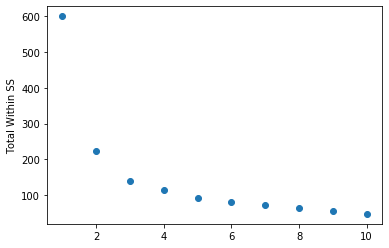

In [35]:
# Insert your code here

k=10
k_iris=Schoose_k(max_k=k, data=iris_scaled_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])

plt.plot(range(1,11),k_iris, 'o')
plt.ylabel("Total Within SS")


---
## Acknowledgements and Reuse
<p>
<small>
Python version by Adam Carter, EPCC, The University of Edinburgh, based on an R version previously created at EPCC, The University of Edinburgh.
</small>
</p>
<p>
<small>
&copy; 2023 EPCC, The University of Edinburgh
</small>
</p>
<p>